In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV,LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# reading data from csv and creating a dataframe
df = pd.read_csv('data.csv')

# dataframe dimensions
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 399284 rows and 33 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399284 entries, 0 to 399283
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            399284 non-null  int64  
 1   App Name              399283 non-null  object 
 2   App Id                399284 non-null  object 
 3   Category              399284 non-null  object 
 4   Rating                399284 non-null  float64
 5   Rating Count          399284 non-null  float64
 6   Installs              399284 non-null  float64
 7   Minimum Installs      399284 non-null  float64
 8   Maximum Installs      399284 non-null  int64  
 9   Free                  399284 non-null  bool   
 10  Price                 399284 non-null  float64
 11  Currency              399284 non-null  object 
 12  Size                  399284 non-null  float64
 13  Minimum Android       398998 non-null  object 
 14  Released              399284 non-null  object 
 15  

In [4]:
# Removing unnecessary columns for install predictions
df = df.drop(['Unnamed: 0','Currency','Released','App Name','App Id','Category','Minimum Installs','Maximum Installs','Minimum Android','Last Updated','Content Rating','Ad Supported','In App Purchases','Editors Choice'], axis = 1)

In [5]:
# Creating a test train dataset split using Installs as Target Variable
X = df.drop(['Installs'],axis=1)
y = df['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 345)

In [6]:
# Creating a OLS model 
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               Installs   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.362e+06
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:23:38   Log-Likelihood:                     -4.5465e+05
No. Observations:              299463   AIC:                                  9.093e+05
Df Residuals:                  299447   BIC:                                  9.095e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [7]:
#Finding the Test dataset accuracy
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)

0.8196789498864973

## Lasso model to improve model performance

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399284 entries, 0 to 399283
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Rating                399284 non-null  float64
 1   Rating Count          399284 non-null  float64
 2   Installs              399284 non-null  float64
 3   Free                  399284 non-null  bool   
 4   Price                 399284 non-null  float64
 5   Size                  399284 non-null  float64
 6   c_lifestyle           399284 non-null  float64
 7   c_education           399284 non-null  float64
 8   c_health              399284 non-null  float64
 9   c_travel              399284 non-null  float64
 10  c_communication       399284 non-null  float64
 11  c_news                399284 non-null  float64
 12  c_tools               399284 non-null  float64
 13  c_weather             399284 non-null  float64
 14  c_business            399284 non-null  float64
 15  

In [10]:
df.columns

Index(['Rating', 'Rating Count', 'Installs', 'Free', 'Price', 'Size',
       'c_lifestyle', 'c_education', 'c_health', 'c_travel', 'c_communication',
       'c_news', 'c_tools', 'c_weather', 'c_business', 'c_entertainment',
       'ReleaseMonth', 'dayssincelastupdated', 'dayssincechange'],
      dtype='object')

In [11]:
#Scaling parameters
scaler = StandardScaler()
df[['Rating','Rating Count','Size','Price','ReleaseMonth','dayssincelastupdated', 'dayssincechange']] = scaler.fit_transform(df[['Rating','Rating Count','Size','Price','ReleaseMonth','dayssincelastupdated', 'dayssincechange']])

In [12]:
# Running LASSO with alpha. = 0.5
X = df.drop(['Installs'],axis=1)
y = df['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 74.67814022957523
Lasso Regression: R^2 score on test set 74.78775609866162


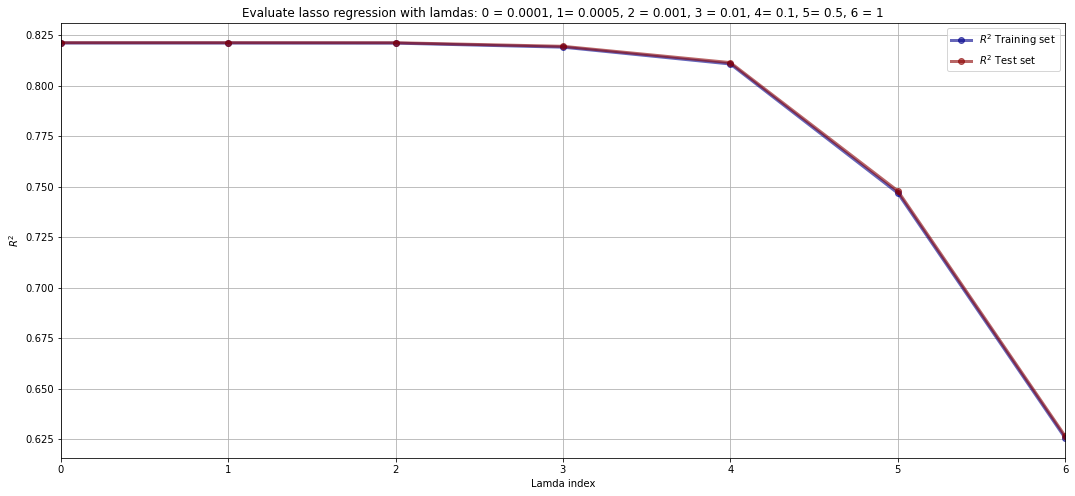

In [18]:
lambdas = (0.0001,0.0005,0.001, 0.01, 0.1, 0.5, 1)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.0001, 1= 0.0005, 2 = 0.001, 3 = 0.01, 4= 0.1, 5= 0.5, 6 = 1')
plt.legend(loc='best')
plt.grid()

In [14]:
# Running LASSO with alpha. = 0.001
X = df.drop(['Installs'],axis=1)
y = df['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

reg = Lasso(alpha=0.001)
reg.fit(X_train, y_train)
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 82.09914727556368
Lasso Regression: R^2 score on test set 82.11808503470132


In [15]:
pd.Series(reg.coef_,index=X.columns)

Rating                 -0.243121
Rating Count            2.205130
Free                    1.448875
Price                  -0.066493
Size                   -0.058756
c_lifestyle             0.106516
c_education             0.087539
c_health                0.000000
c_travel                0.000000
c_communication        -0.000000
c_news                  0.000000
c_tools                -0.087232
c_weather              -0.000000
c_business             -0.273720
c_entertainment        -0.052700
ReleaseMonth            0.005706
dayssincelastupdated   -0.042820
dayssincechange         0.011155
dtype: float64

In [19]:
X = df.drop(['Installs','c_health','c_travel','c_communication','c_news','c_weather'],axis=1)
y = df['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


#Finding the Test dataset accuracy
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)

0.8211769811801893

## Polynomial Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


X = df.drop(['Installs'],axis=1)
y = df['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

d = range(1,4)
for degree in d:
    poly = PolynomialFeatures(degree=degree)
    Xpoly = poly.fit_transform(X)
    Xpoly_test = poly.fit_transform(X_test)

    polyreg = LinearRegression()
    polyreg.fit(Xpoly, y)
    predpoly = polyreg.predict(Xpoly_test)

    mae2 = mean_absolute_error(y_test, predpoly)
    mse2 = mean_squared_error(y_test, predpoly)
    r2poly = r2_score(y_test,pred)
    
    print('Degree: ', degree)
    print('MAE: ', mae2)
    print('RMSE: ', np.sqrt(mse2))
    print('R2: ', r2poly)



Degree:  1
MAE:  0.8202871415679749
RMSE:  1.0574024825046346
R2:  0.8211999416248627
Degree:  2
MAE:  0.7901761866265418
RMSE:  1.012801679341716
R2:  0.8211999416248627
Degree:  3
MAE:  0.7708254692505339
RMSE:  0.9871787042230511
R2:  0.8211999416248627
